E/19/431
Wickramaarachchi I.W.A.P.D.

CO544 - Machine Learning and Data Mining
Lab 02

Objective

 Implementing a linear classifier using the Perceptron algorithm.The perceptron algorithm computes a linear classifier using a stochastic error correcting learning
 algorithm. It is simple and has much historic relevance to this subject and makes a good starting point to learn more sophisticated models and algorithms.
 
 

Generate random and equal number of samples for each class

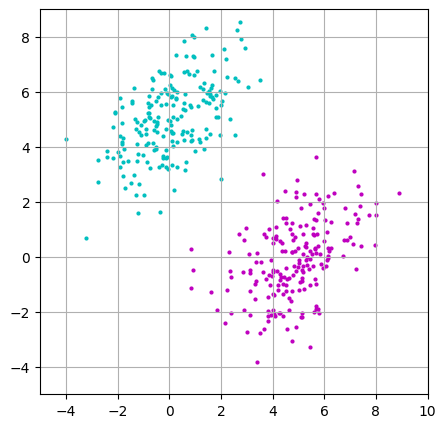

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

#  print(U1.shape)
#  print(X1.shape)
#  print(U2.shape)
#  print(X2.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-5, 10)
ax.set_ylim(-5, 9)
ax.grid(True)

Train a perceptron algorithm to classify generated data

Concatenate data from two classes into one array.

In [108]:
X = np.concatenate((X1, X2), axis=0)
print(X)

[[-2.41021389  3.61942236]
 [-0.51026534  4.00449775]
 [-1.96921353  3.80530853]
 [ 2.02302035  5.6607998 ]
 [-1.35950029  6.13149046]
 [ 1.41636764  8.33557172]
 [ 1.42004398  4.66081201]
 [-0.46158295  4.55330503]
 [ 0.24535899  7.35399068]
 [ 0.61983934  5.91004879]
 [-0.9779197   2.23858996]
 [ 2.14098249  5.94172621]
 [-0.22476802  3.68166973]
 [ 0.97810098  3.84046563]
 [ 1.20469354  4.17233556]
 [ 0.5749284   5.60389195]
 [ 0.11653793  5.84861822]
 [-0.85397108  3.45042599]
 [ 3.03738668  6.17494361]
 [-0.78537193  5.44238036]
 [-1.44454106  5.58924561]
 [-1.84559503  4.86246194]
 [-0.45044941  5.09067549]
 [ 0.29809579  4.19182276]
 [-0.10825968  5.56617857]
 [-1.35157472  2.96180397]
 [-0.90351553  4.4745617 ]
 [-3.22830943  0.67635278]
 [-0.28825994  3.33570875]
 [-1.01444037  3.71594704]
 [-0.13571397  3.87834862]
 [-1.23744692  4.08459804]
 [ 1.46848658  5.97200062]
 [-1.8401519   4.11609496]
 [ 0.29684362  5.97411284]
 [ 0.09662556  3.32348095]
 [-1.58047581  3.46603933]
 

Setting up targets (labels): we set +1 and −1 as labels to indicate the two classes.

In [109]:
labelPos = np.ones(NumDataPerClass)
labelNeg =-1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

Partitioning the data into training and test sets

In [110]:
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;
print(Ntrain)

(200, 2) (200,) (200, 2) (200,)
200


Calculating the percentage of correctly classified examples

In [111]:
def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect +=1
  return 100*nCorrect/N

Iterative error correcting learning

In [112]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(2)
print('Initial assumed weights:',w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
  # Select a data item at random
  #
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]
  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x
  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);
print('Weights after 1000 iterations:',w)
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

Initial assumed weights: [ 1.42257936 -0.56178228]
Initial Percentage Correct:   2.50
Weights after 1000 iterations: [-0.02192284  0.02870619]
Percentage Correct After Training: 100.00  99.50


Plot learning curves

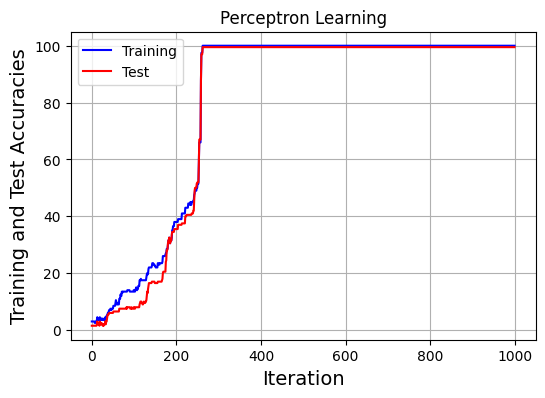

In [113]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

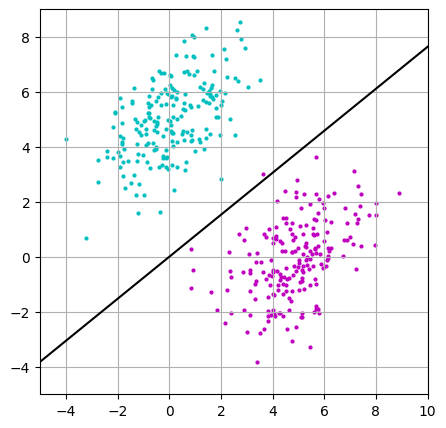

In [114]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-5, 10)
ax.set_ylim(-5, 9)
ax.grid(True)

# Plotting the decision boundary
x_values = np.linspace(-5,10,100)
y_values = -(w[0]/w[1])*x_values
plt.plot(x_values,y_values,color='black')

In [115]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

model = Perceptron()
model.fit(X_train, y_train)

yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" % (accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" % (accuracy_score(yh_test, y_test)))

if accuracy_score(yh_test, y_test) > 0.99:
    print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   0.99
Wow, Perfect Classification on Separable dataset!


Accuracy on training set: 100.0
Accuracy on test set: 98.5


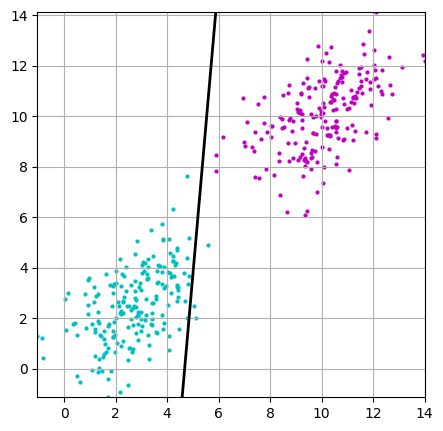

In [116]:
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200

# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[2.5, 2.5]]
m2 = [[10.0, 10.0]]
C = [[2, 1], [1, 2]]

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)

U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1                        # lower triangular matrix A is used to transform vectors of uncorrelated random numbers into correlated ones

U2 = np.random.randn(NumDataPerClass, 2)   #generate random samples from a uniform distribution (np.random.rand) and
                                          #transform them into samples from a Gaussian distribution with the specified mean (m1, m2) and covariance matrix (C).
X2 = U2 @ A.T + m2


# Concatenate data from two classes into one array.
X = np.concatenate((X1, X2), axis=0)

# Adding bias term
O = np.ones((2*NumDataPerClass, 1))
X = np.append(X, O, axis=1)

# Setting up targets (labels)
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

# Partitioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]

# Training and test sets (half half)
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]

# Initialize weights with bias term
w = np.random.randn(X_train.shape[1])

# Perceptron learning loop
MaxIter = 10000
alpha = 0.002
for iter in range(MaxIter):
    r = np.floor(np.random.rand() * NumDataPerClass).astype(int)
    x = X_train[r, :]
    if (y_train[r] * np.dot(x, w) <= 0):
        w += alpha * y_train[r] * x

# Calculate accuracy on the training and test sets
def PercentCorrect(inputs, targets, weights):
    predictions = np.dot(inputs, weights)
    predictions[predictions > 0] = 1
    predictions[predictions <= 0] = -1
    accuracy = np.mean(predictions == targets) * 100
    return accuracy

train_accuracy = PercentCorrect(X_train, y_train, w)
test_accuracy = PercentCorrect(X_test, y_test, w)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-7, 12)
ax.set_ylim(-7, 12)
ax.grid(True)

# Plot linear classifier
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = -(w[0] * x_values + w[2]) / w[1]
plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.xlim(np.min(X[:, 0]), np.max(X[:, 0]))
plt.ylim(np.min(X[:, 1]), np.max(X[:, 1]))
plt.show()
